# <span style='color:orange'> Machine Learning Course Project <span>

## <span style='color:green'> Load BRATS 2017 Data <span>

**Description**: The notebook has code to load the BRATS 2017 dataset. The function supports resizing of dataset images to any arbitrary value, though in this project a size of 120x120 is used (0.5 scaling factor). <br>
**Team:** Unlearners

## Import libraries

In [1]:
from __future__ import print_function
import nibabel as nb
import glob as glob
import numpy as np
import skimage as skimage
import matplotlib.pyplot as plt
from skimage import transform
import cPickle as pickle
import sys as sys

## Main data directory

In [2]:
data_dir = '/home/asa224/Desktop/students_less_asa224/BRATS2017/MICCAI_BraTS17_Data_Training/HGG/'

## Data loading function

In [3]:
def loadData(data_dir, saveDump=False, loadFromDump=False, loadStandardized=False,
             out_shape=(120, 120), num_slices=155, 
             num_sequences=4, num_patients=210, verbose=False):
    
    print('[WARNING] The loader DOES NOT STANDARDIZE DATA, NEITHER IT WRITES STANDARDIZED DATA TO DISK', file=sys.stderr)
    print('It can only load standardized data from disk..', file=sys.stderr)
    if loadFromDump == False:
        print('Loading images...')
        patID = 0
        images = np.empty((num_patients, num_sequences, out_shape[0], out_shape[1], num_slices))

        for patients in glob.glob(data_dir + '/*'):
            i = 0
            if verbose == True:
                print('Currently on patient {}'.format(patID+1))
                
            for imagefile in glob.glob(patients + '/*'):
                if 'seg' in imagefile:
                    continue
                else:
#                     print('Loading the file {}'.format(imagefile.split('/')[-1]))
                    img_obj = nb.load(imagefile)
                    pix_data = img_obj.get_data()

                    ims_resized = np.empty((out_shape[0], out_shape[1], num_slices))
                    for ims in range(num_slices):
                        ims_resized[:, :, ims] = transform.resize(pix_data[:,:,ims], output_shape=out_shape)

                    images[patID, i,:,:,:] = ims_resized
                    i += 1
            patID += 1
        if saveDump == True:
            print('Dumping data to disk...')
            np.save(open('./training_data_orig.npy', 'wb'), images)
    else:
        if loadStandardized == False:
            images = np.load(open('./training_data_orig.npy', 'rb'))
        else:
            images = np.load(open('./training_data_std.npy', 'rb'))
        
    return images

## Load the data

In [4]:
images = loadData(data_dir, verbose=0)

[WARNING] The loader DOES NOT STANDARDIZE DATA, NEITHER IT WRITES STANDARDIZED DATA TO DISK
It can only load standardized data from disk..
/grad/3/asa224/.virtualenvs/ml/local/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Loading images...


# Visualize the dataset

In [5]:
# define some variables which will be helpful
out_shape=(120, 120)
num_slices=155
num_sequences=4 
num_patients=210

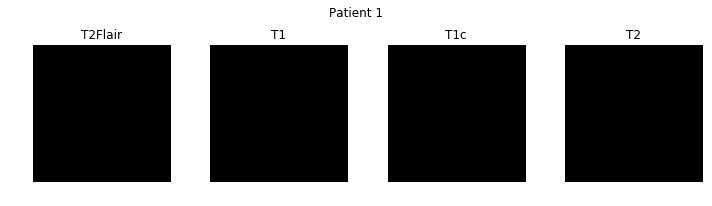

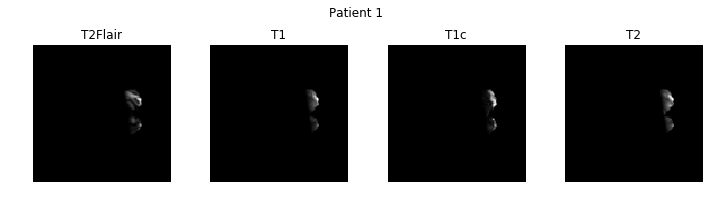

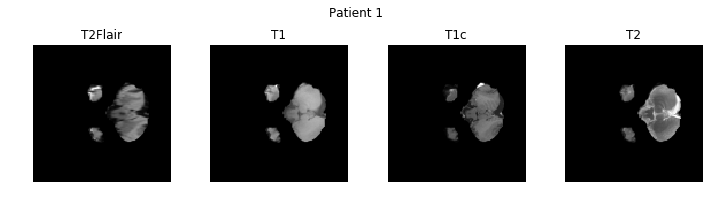

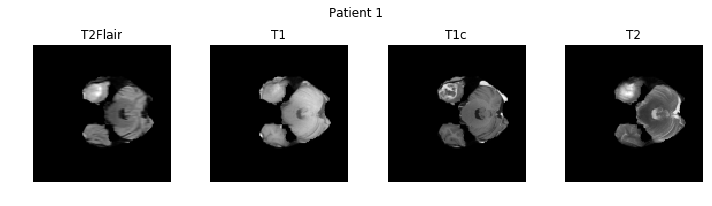

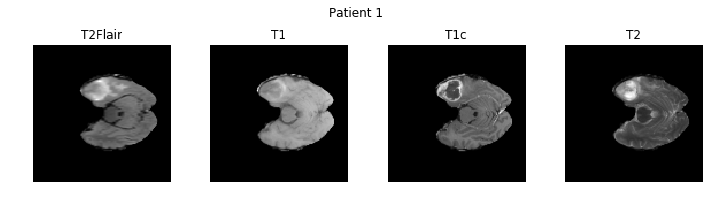

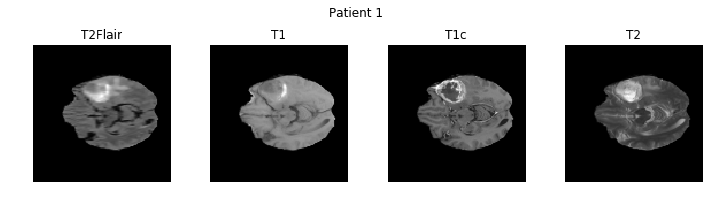

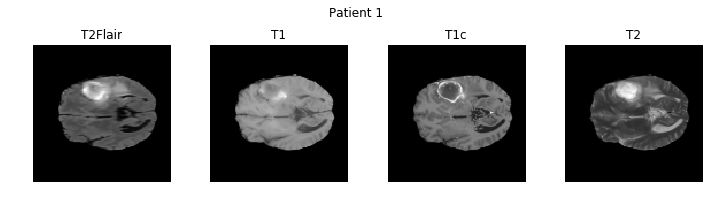

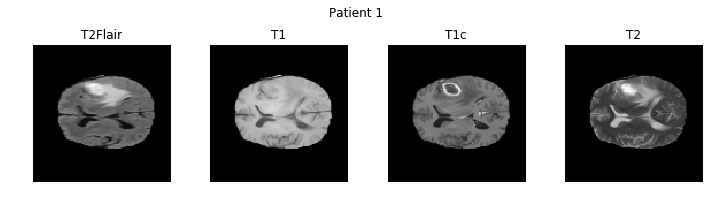

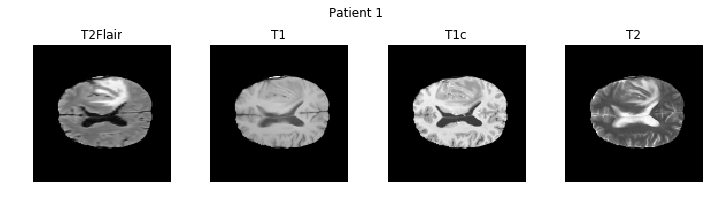

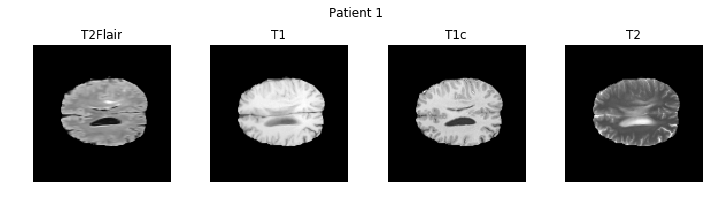

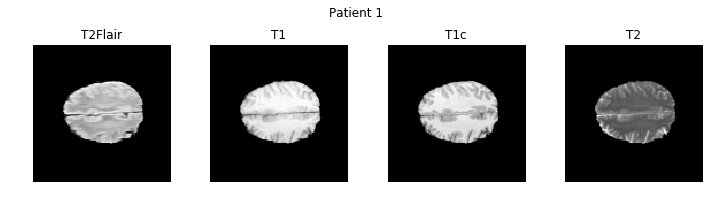

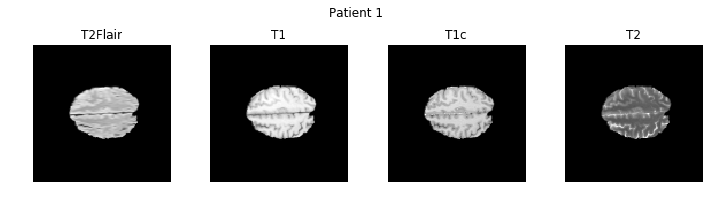

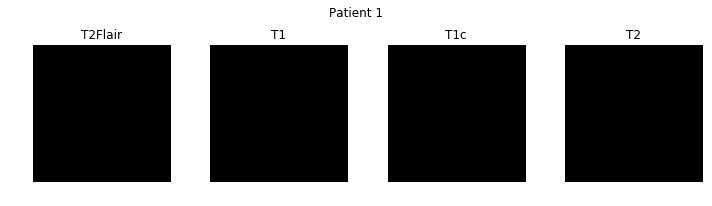

In [6]:
for i in range(0, num_slices, 10):
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10,10))
    f.suptitle('Patient 1')
    ax1.set_title('T2Flair')
    ax1.imshow(images[0, 0,:,:,i], cmap='gray')
    ax2.set_title('T1')
    ax2.imshow(images[0, 1,:,:,i], cmap='gray')
    ax3.set_title('T1c')
    ax3.imshow(images[0, 2,:,:,i], cmap='gray')
    ax4.set_title('T2')
    ax4.imshow(images[0, 3,:,:,i], cmap='gray')
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')
    ax4.axis('off')
    f.tight_layout()
    f.subplots_adjust(top=1.65)
    plt.show()

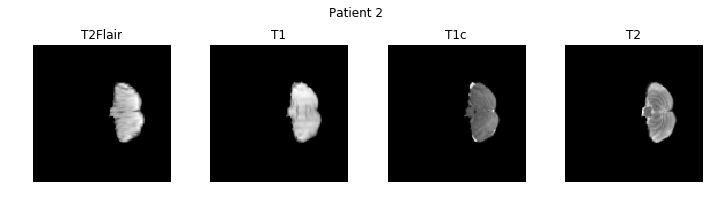

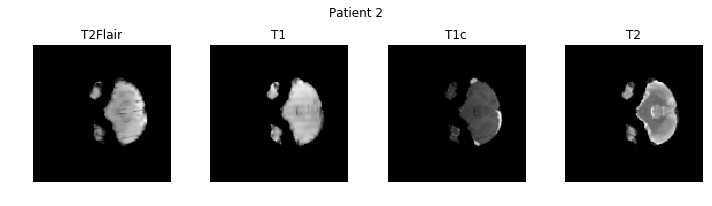

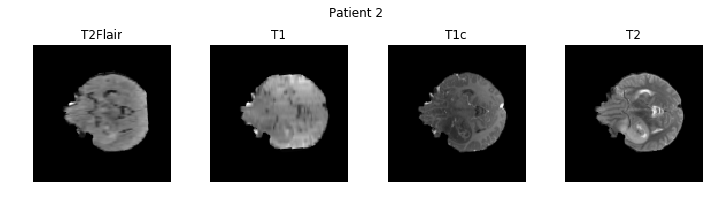

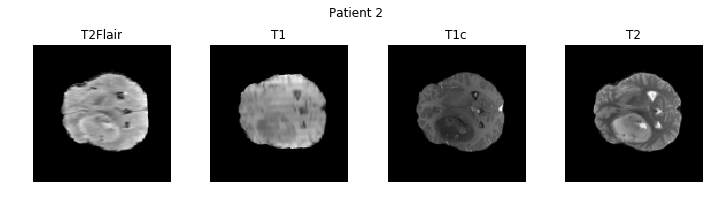

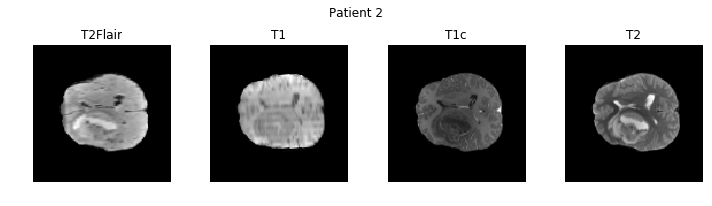

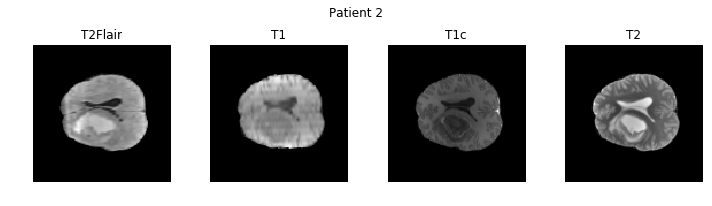

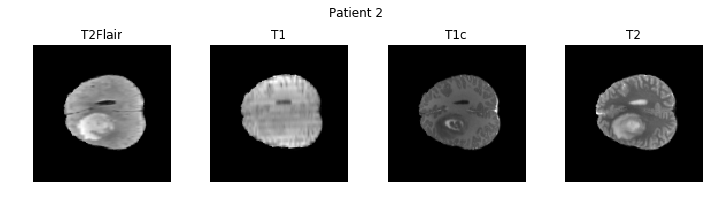

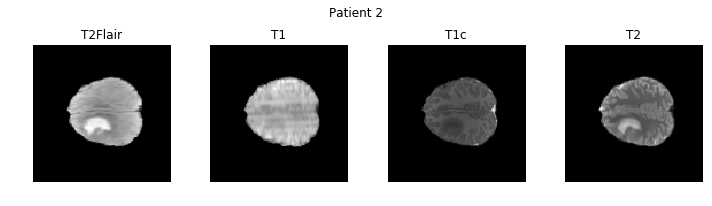

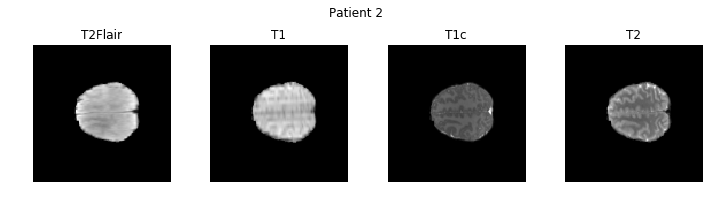

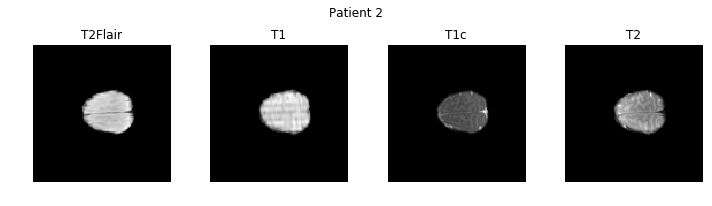

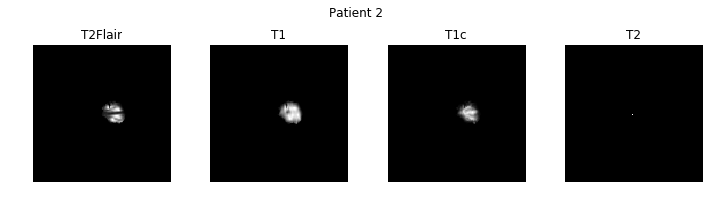

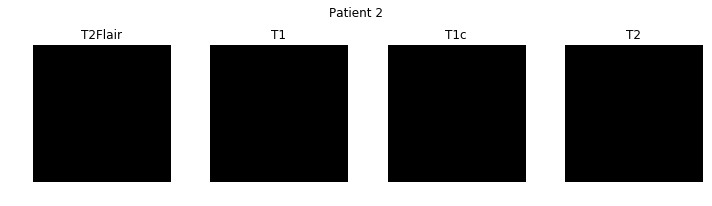

In [7]:
for i in range(10, num_slices, 10):
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10,10))
    f.suptitle('Patient 2')
    ax1.set_title('T2Flair')
    ax1.imshow(images[1, 0,:,:,i], cmap='gray')
    ax2.set_title('T1')
    ax2.imshow(images[1, 1,:,:,i], cmap='gray')
    ax3.set_title('T1c')
    ax3.imshow(images[1, 2,:,:,i], cmap='gray')
    ax4.set_title('T2')
    ax4.imshow(images[1, 3,:,:,i], cmap='gray')
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')
    ax4.axis('off')
    f.tight_layout()
    f.subplots_adjust(top=1.65)
    plt.show()

# Standardization to sequence wise zero mean and unit variance

Now we need to standardize the dataset sequence wise, ie. for a $seq_t$ (t = 4 sequences) for all patients $pat_n$ ($n$ = 210), get the mean pixel value, and the standard deviation value. 

Then, for a pixels $p_i$ in image $i$ of patient $pat_n$, we have:

$p_i = \dfrac{p_i - mean(seq_n)}{std(seq_n)}$

This is the shape of the dataset right now. Essentially we call it an n-dimensional tensor

In [8]:
images.shape

(210, 4, 120, 120, 155)

Find the mean and std by choosing a sequence over all patients (this can be slow due to multi-dimensional tensor)

In [9]:
def standardize(images, saveDump=False):
    print('Calculating mean value..')
    mn = []
    for i in range(4):
        mn.append(np.mean(images[:, i, :, :, :]))
    
    print('Calculating standard deviation..')
    std = []
    for i in range(4):
        std.append(np.std(images[:, i, :, :, :]))
        
    
    print('Starting standardization process..')
    
    for i in range(4):
        images[:, i, :, :, :] = ((images[:, i, :, :, :] - mn[i]) / float(std[i]))
        
    print('Data standardized!')
    
    if saveDump == True:
        print('Dumping standardized data to disk..')
        np.save(open('./training_data_std.npy', 'wb'), images)
    print('Done!')
    
    return images

In [10]:
images = standardize(images)

Calculating mean value..
Calculating standard deviation..
Starting standardization process..
Data standardized!
Done!


## Confirm if standardization is done properly or not

**To confirm if the standardization is done correctly, we recheck the mean and std values. The mean values should be very close to 0 (they're usually not 0 due to floating point errors), and std values will be close to 1. **

In [11]:
mn = []
for i in range(4):
    mn.append(np.mean(images[:, i, :, :, :]))
    
std = []
for i in range(4):
    std.append(np.std(images[:, i, :, :, :]))

In [12]:
mn

[-1.4418008180469651e-13,
 1.6283656435723366e-14,
 4.0335892590010348e-14,
 3.5151224147587445e-14]

In [13]:
std

[1.0000000000001035,
 1.0000000000000877,
 1.0000000000001739,
 0.99999999999997147]

## Visualize data after standardization. There should'nt be much difference visible

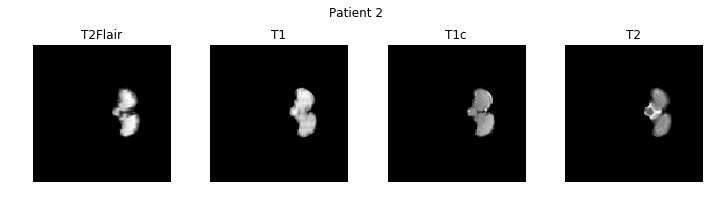

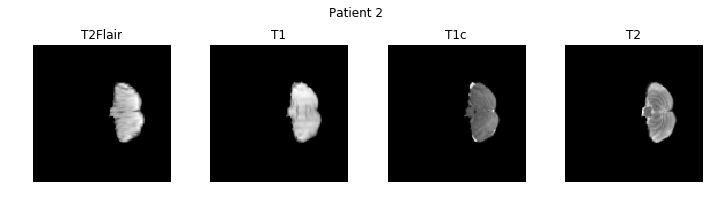

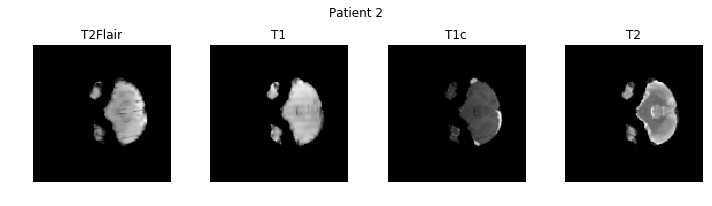

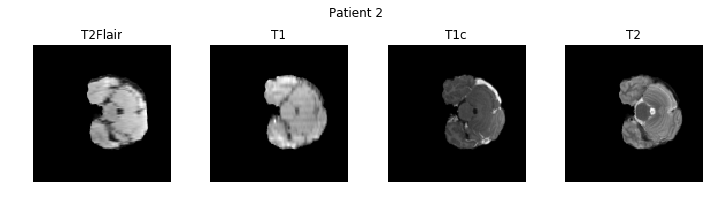

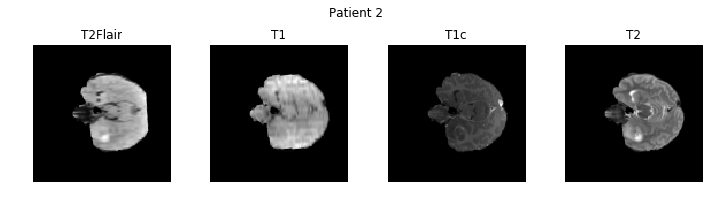

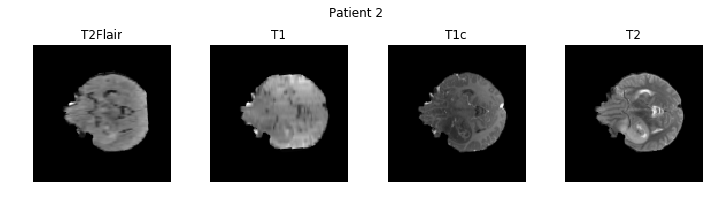

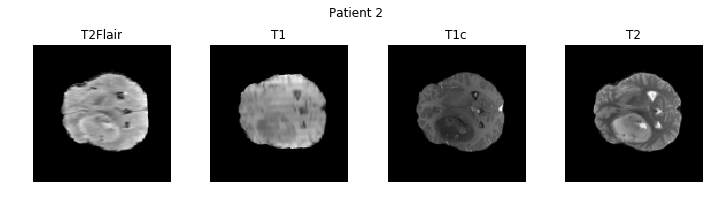

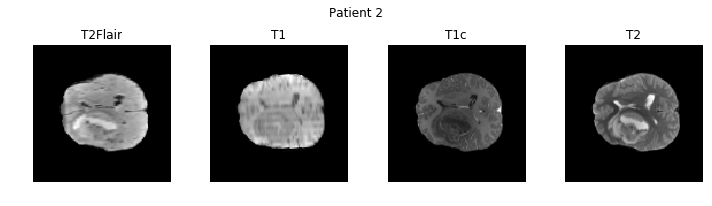

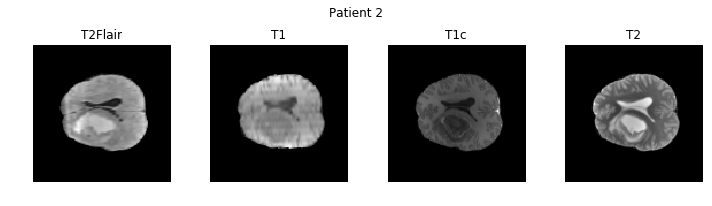

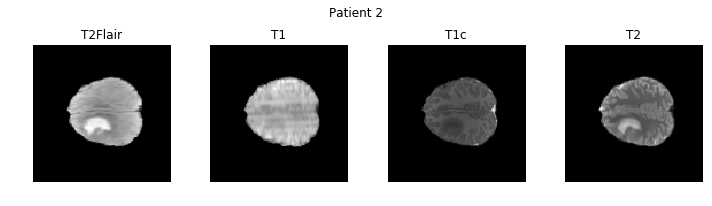

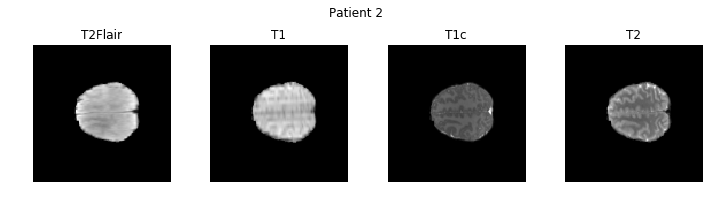

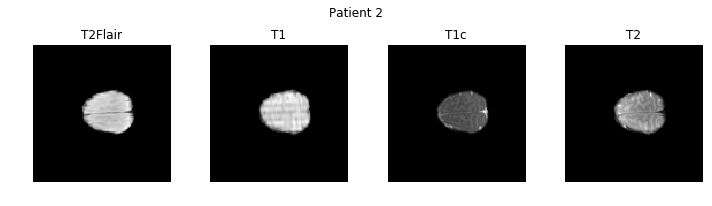

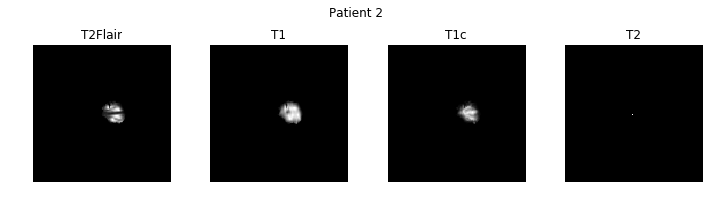

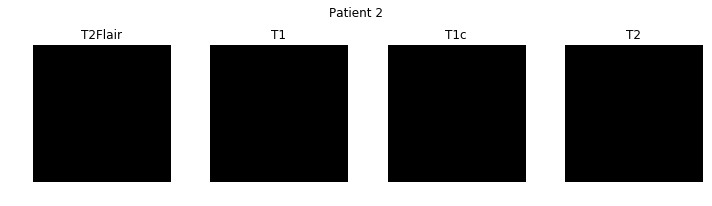

In [14]:
for i in range(10, num_slices, 10):
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10,10))
    f.suptitle('Patient 2')
    ax1.set_title('T2Flair')
    ax1.imshow(images[1, 0,:,:,i], cmap='gray')
    ax2.set_title('T1')
    ax2.imshow(images[1, 1,:,:,i], cmap='gray')
    ax3.set_title('T1c')
    ax3.imshow(images[1, 2,:,:,i], cmap='gray')
    ax4.set_title('T2')
    ax4.imshow(images[1, 3,:,:,i], cmap='gray')
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')
    ax4.axis('off')
    f.tight_layout()
    f.subplots_adjust(top=1.65)
    plt.show()